## Specifying Result Directories
This notebook demonstrates how to visualize benchmark results of Bayesmark. First of all, please specify the root directory, `db_root`, and target sub-directories, `db_ids`, of Bayesmark results.

In [1]:
# Please specify the root directory of bayesmark output as `db_root`.
db_root = "../output"

# Here, let's compare the results of the vanillaTuRBO and our proposed method.
db_ids = [
    "run_large_mksturbo",  
    "run_large_turbo",
]

## Function to Plot
Benchmark results of Bayesmark can be loaded as [xarray](http://xarray.pydata.org/en/stable/) objects, which is useful for performance analysis. For example, the following function aggregates the results for each db id and plot the transition of their mean and variance.

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

import bayesmark.constants as cc
from bayesmark.serialize import XRSerializer

def plot(db_root, db_id, label, plt_obj, func_name_filter=None, generalization=False):
        if generalization:
            objective = "generalization"
        else:
            objective = cc.VISIBLE_TO_OPT
    
        agg_results = XRSerializer.load_derived(os.path.abspath(db_root), db=db_id, key=cc.PERF_RESULTS)[0]
        normed_means = agg_results[cc.NORMED_MEAN].sel({cc.OBJECTIVE: objective, cc.METHOD: agg_results[cc.METHOD].values[0]})

        funcs = agg_results[cc.TEST_CASE].values
        if func_name_filter is None:
            funcs_ = [f for f in agg_results[cc.TEST_CASE].values]  # Plot all functions' results.
        else:
            funcs_ = [f for f in agg_results[cc.TEST_CASE].values if func_name_filter(f)]  # Plot only when the function name meets the condition.
            
        model_values = normed_means.sel({cc.TEST_CASE: funcs_})
        model_means = model_values.mean(cc.ITER)

        iters = range(model_values.values.shape[0])
        mean = np.mean(model_values.values.T, axis=0)
        std = np.std(model_values.values.T, axis=0)

        plt_obj.plot(iters, mean, label=label)        
        plt_obj.fill_between(
            range(len(mean)),
            mean - std,
            mean + std,
            alpha=0.25,
        )

/Users/sano/workspaces/bboc-optuna-developers/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Plotting the Results for Each ML Model

<Figure size 432x288 with 0 Axes>

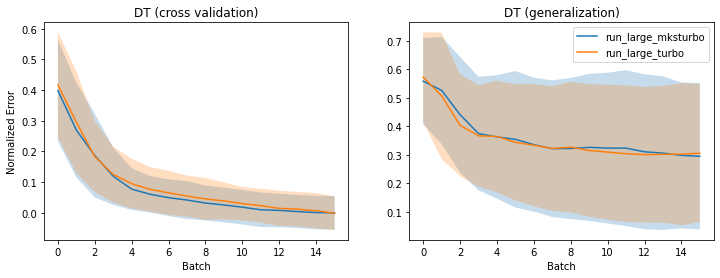

<Figure size 432x288 with 0 Axes>

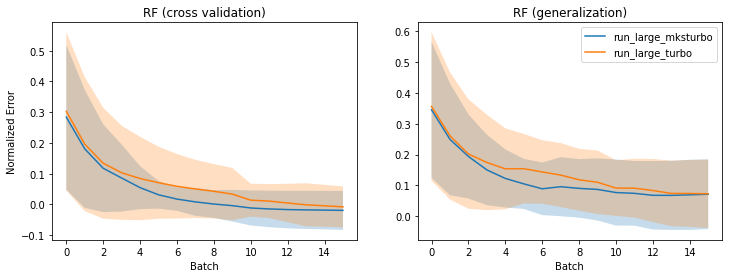

<Figure size 432x288 with 0 Axes>

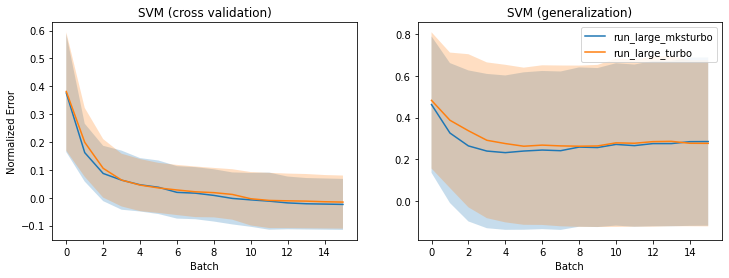

<Figure size 432x288 with 0 Axes>

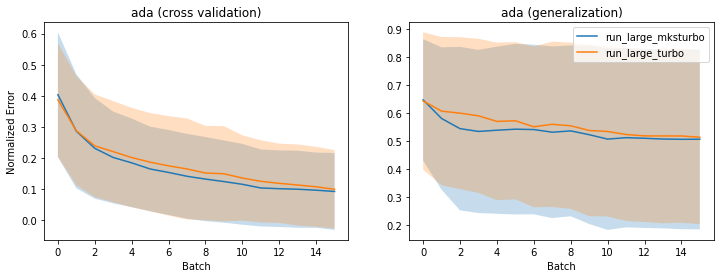

<Figure size 432x288 with 0 Axes>

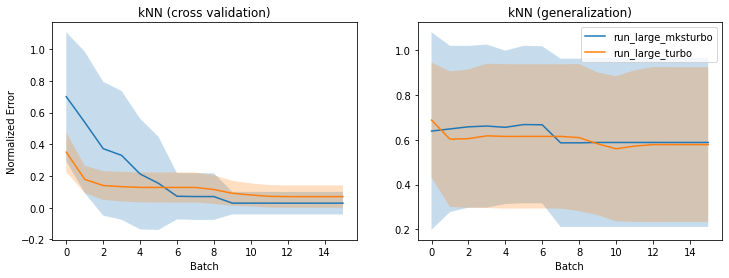

<Figure size 432x288 with 0 Axes>

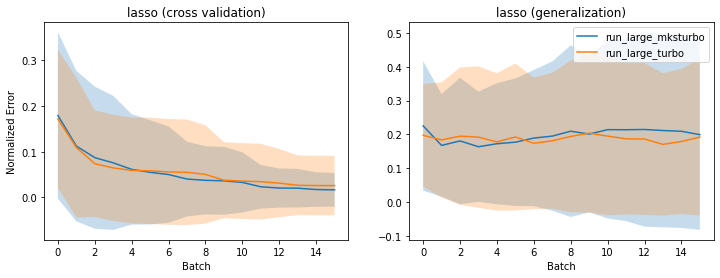

<Figure size 432x288 with 0 Axes>

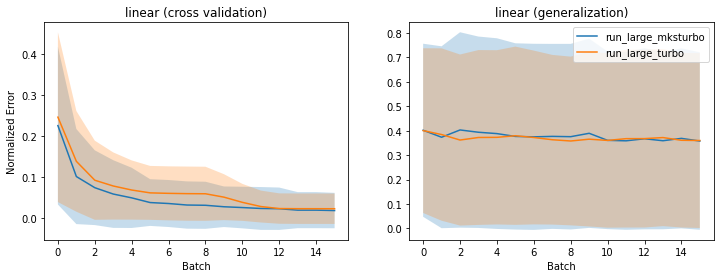

<Figure size 432x288 with 0 Axes>

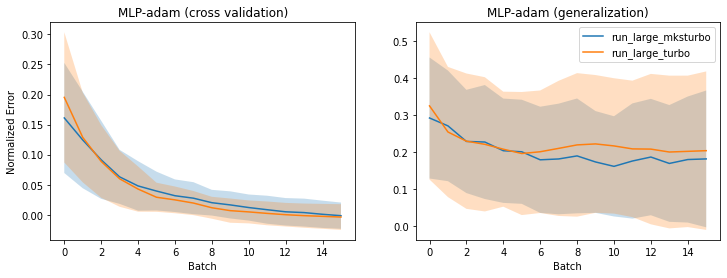

<Figure size 432x288 with 0 Axes>

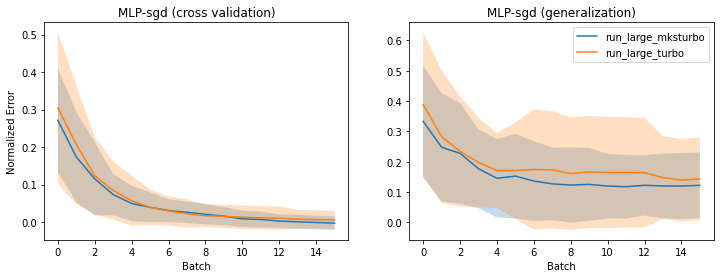

In [3]:
model_names = ["DT", "RF", "SVM", "ada", "kNN", "lasso", "linear", "MLP-adam", "MLP-sgd"]

for model_name in model_names:
    plt.clf()

    fig = plt.figure(figsize=(12, 4))
    plt_left = fig.add_subplot(1, 2, 1)
    plt_right = fig.add_subplot(1, 2, 2)
    
    for db_id in db_ids:
        plt_left.set_title("{} (cross validation)".format(model_name))
        plt_left.set_xlabel("Batch")
        plot(db_root, db_id, db_id, plt_left, lambda x: x.startswith(model_name), generalization=False)

        plt_right.set_title("{} (generalization)".format(model_name))
        plot(db_root, db_id, db_id, plt_right, lambda x: x.startswith(model_name), generalization=True)

    plt.xlabel("Batch")
    plt_left.set_ylabel("Normalized Error")
    plt.legend()
    plt.show()

## Plotting the Summarized Results of All ML Models

<Figure size 432x288 with 0 Axes>

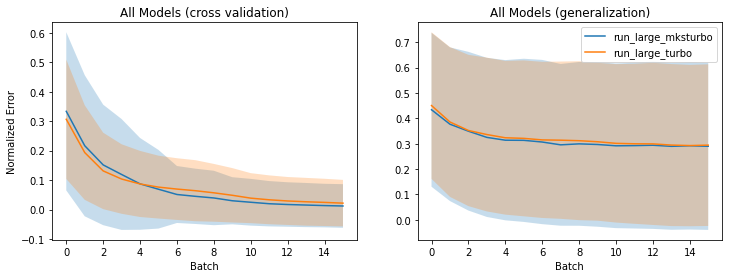

In [4]:
plt.clf()

fig = plt.figure(figsize=(12, 4))
plt_left = fig.add_subplot(1, 2, 1)
plt_right = fig.add_subplot(1, 2, 2)

for db_id in db_ids:
    plt_left.set_title("All Models (cross validation)".format(model_name))
    plt_left.set_xlabel("Batch")
    plot(db_root, db_id, db_id, plt_left, generalization=False)

    plt_right.set_title("All Models (generalization)".format(model_name))
    plot(db_root, db_id, db_id, plt_right, generalization=True)

plt.xlabel("Batch")
plt_left.set_ylabel("Normalized Error")
plt.legend()
plt.show()